<a href="https://colab.research.google.com/github/tvlaz2020/cis230Week7/blob/main/CIS230FinalExam_TedVlaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 230 Final Exam

The following notebook could be used as a shell to complete your CIS 230 final project/exam. Feel free to make as many Code or Text sections as you need. The sections provided are just meant as a guide and/or suggestion for you to consider. There's no unique correct answer and part of the project is that you can justify your approach.

# Section 1: Problem Scoping

Use the following section to summarize the information from the PPT, describe the roadmap you attempt to take on the problem, and/or metrics that you think would make a succesful solution.

In [ ]:
# Enter your answer here
#We'd like to create a model that would help predict a loan applicants ability to repay a loan.  Based off historical applicant
#data and the issued loan's status(deaulted/repayed), we can predict an applicant's likelihood to succesfully repay.

# Section 2: Data Acquisition

Two important things you should do here:
* Import Packages

* Import Data

In [211]:
# Enter your answer here


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model 1 : KNN
from sklearn.neighbors import KNeighborsClassifier


# Model 2 : SVC
from sklearn.svm import SVC


# Model 3 : Decision Tree
from sklearn.tree import DecisionTreeClassifier


# import data source
sourcedata = pd.read_csv("https://raw.githubusercontent.com/tvlaz2020/cis230Week7/main/LoanData.csv")
sourcedata

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Section 3: Data Exploration

This section will be a big portion of the notebook. Remember that there's no single correct answer. However, there are some portions that I recommend you incorporate here:

* Do a quick write up of the features.

* Data Quality and Missing Values.

>* Explicitly show missing values
>* Describe your approach to cleaning the data
>* Clean/Imput the data

* Convert categorical data into numerical data

In [212]:
# Enter your answer here.
# Remember that you can add Text Sections as you see fit.
# You are not limited to having only code sections.

#print(sourcedata.isnull().values.sum())
#print(sourcedata.isnull().sum())

#The field that is the highest offender for missing data is Credit History, followed by Self Employed, then Loan Amount.  There are 614 records in the data set.
#if we remove the records with missing values at a maximum we could lose nearly 25% of the data(if every record listed as having a missing value only has the single
#missing value listed).

#I think it wise to try to replace values where we can with the MEAN.

#had to navigate the Dependents column a bit due to the presence of strings for dependents 3+, then replace NaN with mean values, then convert everything to int.

sourcedata['Dependents'].replace('3+', '3', inplace=True)
sourcedata["Dependents"].fillna(value=Dependentsmean_value, inplace=True)
sourcedata['Dependents'] = sourcedata['Dependents'].astype(int)
Dependentsmean_value = sourcedata['Dependents'].mean().astype(int)

#print(sourcedata[['Dependents']].to_string(index=False))

LoanAmountmean_value = sourcedata['LoanAmount'].mean()
sourcedata["LoanAmount"].fillna(value=LoanAmountmean_value, inplace=True)
sourcedata.LoanAmount = sourcedata.LoanAmount.round(1)

LoanAmountTermmean_value = sourcedata['Loan_Amount_Term'].mean()
sourcedata["Loan_Amount_Term"].fillna(value=LoanAmountTermmean_value, inplace=True)

CreditHistoryvalue = '0'
sourcedata["Credit_History"].fillna(value=CreditHistoryvalue, inplace=True)

print(sourcedata.isnull().values.sum())
print(sourcedata.isnull().sum())







48
Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Y    388
N    178
Name: Approval, dtype: int64


<Axes: xlabel='Approval', ylabel='count'>

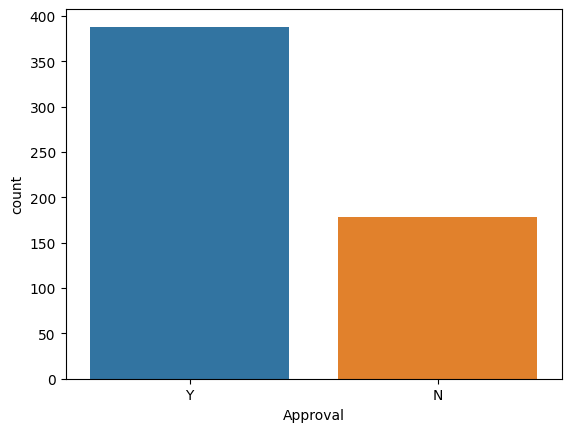

In [213]:

#After some replacement, I reduced the number of mising values by 101.  This gets the values we could eliminate due to missing values down to 7%.
#The values that I did not eleminate are boolean in nature and cannot replace using mean.  (Gender, Married, Self_Employed)

sourcedata.dropna(inplace=False)
sourcedata = sourcedata.dropna()

print(sourcedata.isnull().values.sum())
print(sourcedata.isnull().sum())

#Rename loan application status as Approval
sourcedata = sourcedata.rename(columns={'Loan_Status':'Approval'})

#Check data with np.character
print(sourcedata.Approval.value_counts())
sns.countplot(sourcedata, x='Approval')




In [214]:

#Convert columns that area binary/boolean in nature to bit values 0/1.
sourcedata['Gender'] = [1 if i.strip()=='Male' else 0 for i in sourcedata.Gender]
sourcedata['Married'] = [1 if i.strip()=='Yes' else 0 for i in sourcedata.Married]
sourcedata['Education'] = [1 if i.strip()=='Graduate' else 0 for i in sourcedata.Education]
sourcedata['Self_Employed'] = [1 if i.strip()=='Yes' else 0 for i in sourcedata.Self_Employed]
sourcedata['Property_Area'] = [1 if i.strip()=='Yes' else 0 for i in sourcedata.Property_Area]
sourcedata['Approval'] = [1 if i.strip()=='Y' else 0 for i in sourcedata.Approval]

#Drop loan_id column
sourcedata = sourcedata.drop('Loan_ID', axis=1)
sourcedata

#sourcedata.info()

#Convert Credit_History to int
sourcedata['Credit_History'] = sourcedata['Credit_History'].astype(int)

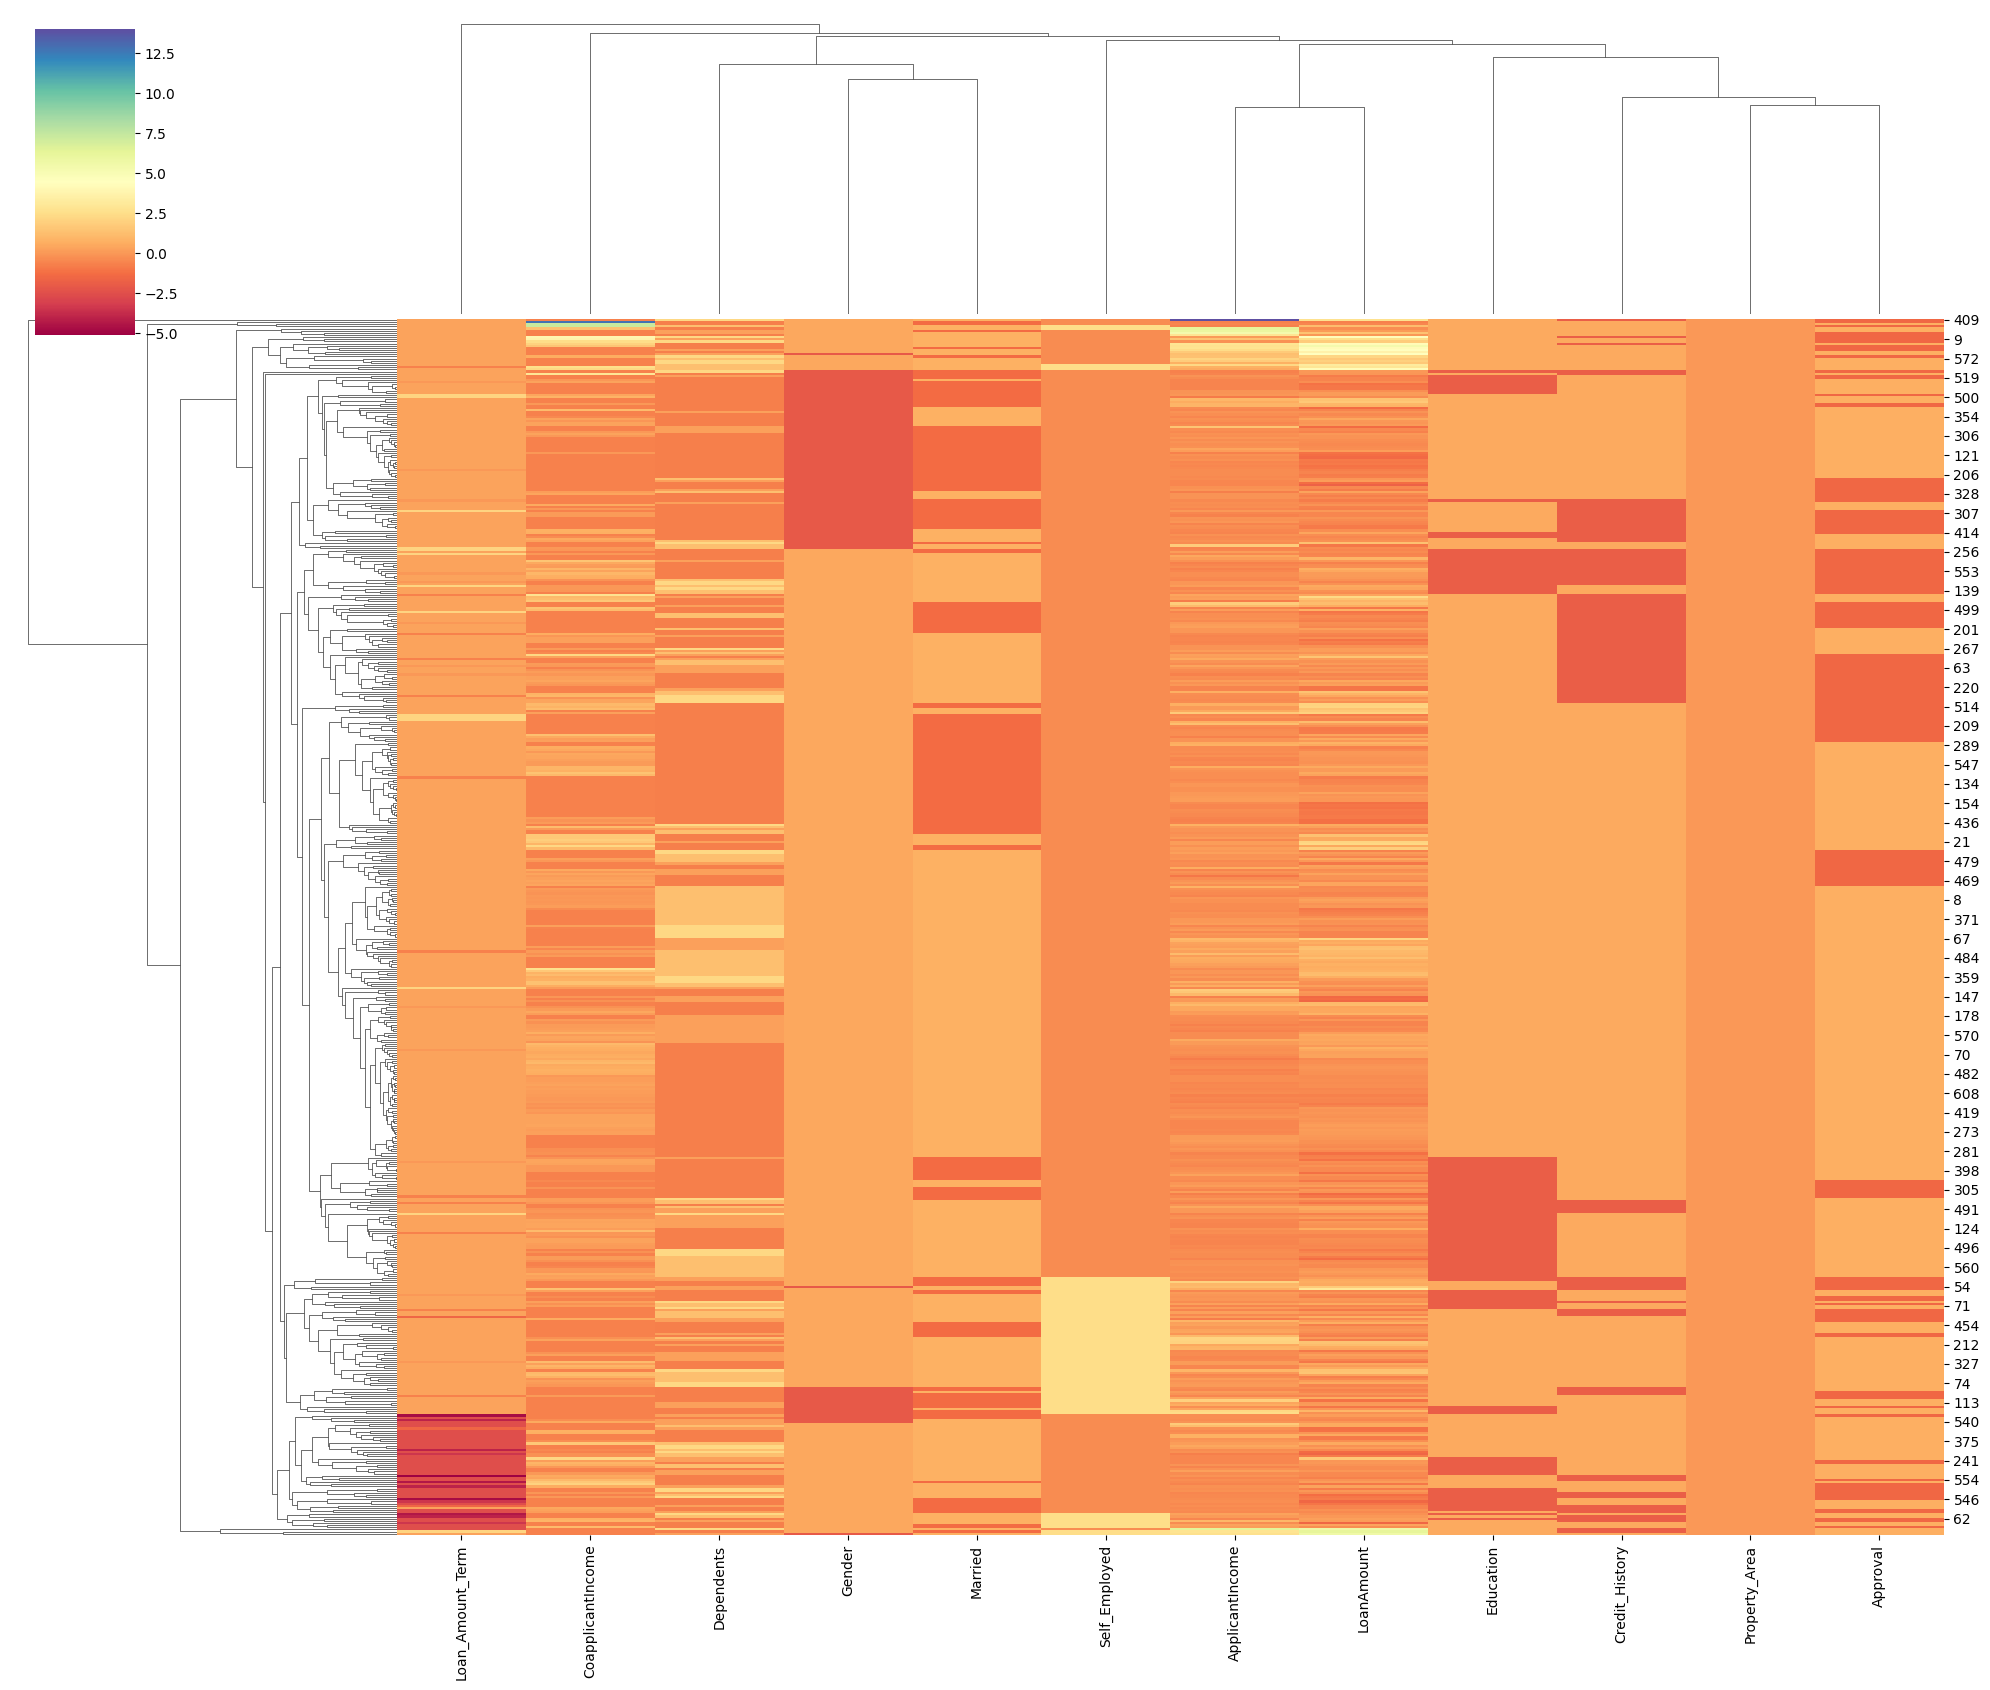

In [215]:

#ClusterMap.  Had to research a alternative solution as the script from week 6 was giving me fits.
from scipy.stats import zscore
sns.clustermap(sourcedata.apply(lambda col: zscore(col) if col.std()!=0 else col, axis=0),
              fmt = '.2f',figsize=(20,17),cmap="Spectral")

# Section 4: Modeling

This section will allow you set up your models. Pick three of the algorithms we have explored, you can pick more if you wish even if we have not used them in class. I would recommend that you also incorporate Text sections or comments that explain/show your rationale to optimize the models.

* Separate your data into training and testing sets

* Use a separate code section for each model

* Make sure you feed the test data after you have trained the model

In [216]:
# Enter your answer here

X = sourcedata.drop(['Approval'], axis=1)
y = sourcedata['Approval']
columns = X.columns.tolist()

# Split the data for both training and testing data. Keeping test size at 25%.  Tested moving this value around and decided this value was the most useful.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)

# Let's standardize the data so that the range of the features are similar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df["Approval"] = y_train

#(KNN) Used nieghboring value of 9.  I felt like I was getting extreme going over this value and 11 and above didn't seem to improve accuracy
clf_knn = KNeighborsClassifier(n_neighbors=9)
clf_knn.fit(X_train, y_train)

#(SVM) Experiment with sigmoid, linear, rbf.  They were all pretty close but linear seemed to be the best.
clf_svm = SVC(kernel='linear')
clf_svm.fit(X_train, y_train)

#(Decision Tree) Didn't find any good options for manipulating decision tree alogrithm
clf_dt = DecisionTreeClassifier(random_state = 0)
clf_dt = clf_dt.fit(X_train, y_train)

X_train.shape: (424, 11)
X_test.shape: (142, 11)


# Section 5: Evaluate

Use this section to show the result of each of the models. You can reuse some of the techniques we used in Week 6 to justify your analysis on the best result.

KNN Test Score: 0.7465, Train Score: 0.7642
CM: 
 [[25 23]
 [13 81]]
              precision    recall  f1-score   support

           0       0.66      0.52      0.58        48
           1       0.78      0.86      0.82        94

    accuracy                           0.75       142
   macro avg       0.72      0.69      0.70       142
weighted avg       0.74      0.75      0.74       142

SVM Test Score: 0.7817, Train Score: 0.7571
CM: 
 [[27 21]
 [10 84]]
              precision    recall  f1-score   support

           0       0.73      0.56      0.64        48
           1       0.80      0.89      0.84        94

    accuracy                           0.78       142
   macro avg       0.76      0.73      0.74       142
weighted avg       0.78      0.78      0.77       142

Decision Tree Test Score: 0.7042, Train Score: 1.0
CM: 
 [[17 31]
 [11 83]]
              precision    recall  f1-score   support

           0       0.61      0.35      0.45        48
           1       0.73

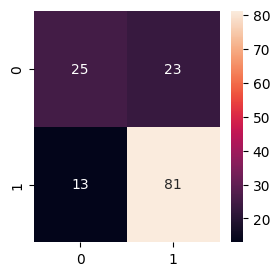

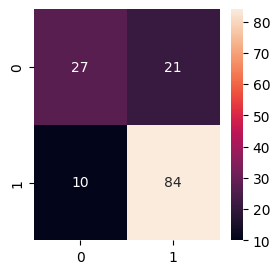

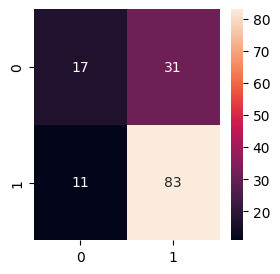

In [217]:
# Your answer here! (KNN)
y_pred_test1 = clf_knn.predict(X_test)
y_pred_train1 = clf_knn.predict(X_train)
cm = confusion_matrix(y_test, y_pred_test1)
acc_test = accuracy_score(y_test, y_pred_test1)
acc_train = accuracy_score(y_train, y_pred_train1)

print("KNN Test Score: {}, Train Score: {}".format(round(acc_test,4), round(acc_train,4)))
print("CM: \n",cm)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred_test1))


# Your answer here! (SVM)
y_pred_test2 = clf_svm.predict(X_test)
y_pred_train2 = clf_svm.predict(X_train)
cm2 = confusion_matrix(y_test, y_pred_test2)
acc_test2 = accuracy_score(y_test, y_pred_test2)
acc_train2 = accuracy_score(y_train, y_pred_train2)


print("SVM Test Score: {}, Train Score: {}".format(round(acc_test2,4), round(acc_train2,4)))
print("CM: \n",cm2)
plt.figure(figsize=(3,3))
sns.heatmap(cm2, annot=True)
print(classification_report(y_test, y_pred_test2))

# Your answer here! (Decision Tree)
y_pred_test3 = clf_dt.predict(X_test)
y_pred_train3 = clf_dt.predict(X_train)
cm3 = confusion_matrix(y_test, y_pred_test3)
acc_test3 = accuracy_score(y_test, y_pred_test3)
acc_train3 = accuracy_score(y_train, y_pred_train3)


print("Decision Tree Test Score: {}, Train Score: {}".format(round(acc_test3,4), round(acc_train3,4)))
print("CM: \n",cm3)
plt.figure(figsize=(3,3))
sns.heatmap(cm3, annot=True)
print(classification_report(y_test, y_pred_test3))

In [218]:
#Trying a little differnt approach and removing some of the boolean/bit columns
#which might not be as important to financial decisions??  Also removing missing value rows...not great idea, but lets see.

sourcedata = pd.read_csv("https://raw.githubusercontent.com/tvlaz2020/cis230Week7/main/LoanData.csv")

sourcedata.dropna(inplace=False)
sourcedata = sourcedata.dropna()

sourcedata = sourcedata.drop('Loan_ID', axis=1)
sourcedata = sourcedata.drop('Gender', axis=1)
sourcedata = sourcedata.drop('Married', axis=1)
sourcedata = sourcedata.drop('Education', axis=1)
sourcedata = sourcedata.drop('Property_Area', axis=1)


sourcedata['Dependents'].replace('3+', '3', inplace=True)
sourcedata["Dependents"].fillna(value=Dependentsmean_value, inplace=True)
sourcedata['Dependents'] = sourcedata['Dependents'].astype(int)
Dependentsmean_value = sourcedata['Dependents'].mean().astype(int)


#Rename loan application status as Approval
sourcedata = sourcedata.rename(columns={'Loan_Status':'Approval'})

#Convert Credit_History to int
sourcedata['Credit_History'] = sourcedata['Credit_History'].astype(int)

sourcedata['Self_Employed'] = [1 if i.strip()=='Yes' else 0 for i in sourcedata.Self_Employed]
sourcedata['Approval'] = [1 if i.strip()=='Y' else 0 for i in sourcedata.Approval]

sourcedata






,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Approval
1,1,0,4583,1508.0,128.0,360.0,1,0
2,0,1,3000,0.0,66.0,360.0,1,1
3,0,0,2583,2358.0,120.0,360.0,1,1
4,0,0,6000,0.0,141.0,360.0,1,1
5,2,1,5417,4196.0,267.0,360.0,1,1
...,...,...,...,...,...,...,...,...
609,0,0,2900,0.0,71.0,360.0,1,1
610,3,0,4106,0.0,40.0,180.0,1,1
611,1,0,8072,240.0,253.0,360.0,1,1
612,2,0,7583,0.0,187.0,360.0,1,1


In [221]:
# Training #2

X = sourcedata.drop(['Approval'], axis=1)
y = sourcedata['Approval']
columns = X.columns.tolist()

# Split the data for both training and testing data. Keeping test size at 25%.  Tested moving this value around and decided this value was the most useful.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)

# Let's standardize the data so that the range of the features are similar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df["Approval"] = y_train

#(KNN) Used nieghboring value of 3(standard).
clf_knn.fit(X_train, y_train)

#(SVM) Experiment with sigmoid, linear, rbf.
clf_svm = SVC(kernel='rbf')
clf_svm.fit(X_train, y_train)

#(Decision Tree) Didn't find any good options for manipulating decision tree alogrithm
clf_dt = DecisionTreeClassifier(random_state = 0)
clf_dt = clf_dt.fit(X_train, y_train)

X_train.shape: (360, 7)
X_test.shape: (120, 7)


KNN Test Score: 0.7583, Train Score: 0.8444
CM: 
 [[10 23]
 [ 6 81]]
              precision    recall  f1-score   support

           0       0.62      0.30      0.41        33
           1       0.78      0.93      0.85        87

    accuracy                           0.76       120
   macro avg       0.70      0.62      0.63       120
weighted avg       0.74      0.76      0.73       120

SVM Test Score: 0.7417, Train Score: 0.85
CM: 
 [[ 9 24]
 [ 7 80]]
              precision    recall  f1-score   support

           0       0.56      0.27      0.37        33
           1       0.77      0.92      0.84        87

    accuracy                           0.74       120
   macro avg       0.67      0.60      0.60       120
weighted avg       0.71      0.74      0.71       120

Decision Tree Test Score: 0.7667, Train Score: 1.0
CM: 
 [[17 16]
 [12 75]]
              precision    recall  f1-score   support

           0       0.59      0.52      0.55        33
           1       0.82  

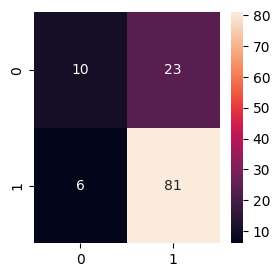

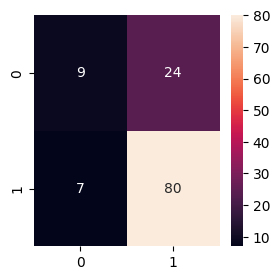

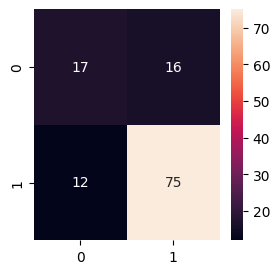

In [222]:
# Your answer here! (KNN)
y_pred_test1 = clf_knn.predict(X_test)
y_pred_train1 = clf_knn.predict(X_train)
cm = confusion_matrix(y_test, y_pred_test1)
acc_test = accuracy_score(y_test, y_pred_test1)
acc_train = accuracy_score(y_train, y_pred_train1)

print("KNN Test Score: {}, Train Score: {}".format(round(acc_test,4), round(acc_train,4)))
print("CM: \n",cm)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred_test1))


# Your answer here! (SVM)
y_pred_test2 = clf_svm.predict(X_test)
y_pred_train2 = clf_svm.predict(X_train)
cm2 = confusion_matrix(y_test, y_pred_test2)
acc_test2 = accuracy_score(y_test, y_pred_test2)
acc_train2 = accuracy_score(y_train, y_pred_train2)


print("SVM Test Score: {}, Train Score: {}".format(round(acc_test2,4), round(acc_train2,4)))
print("CM: \n",cm2)
plt.figure(figsize=(3,3))
sns.heatmap(cm2, annot=True)
print(classification_report(y_test, y_pred_test2))

# Your answer here! (Decision Tree)
y_pred_test3 = clf_dt.predict(X_test)
y_pred_train3 = clf_dt.predict(X_train)
cm3 = confusion_matrix(y_test, y_pred_test3)
acc_test3 = accuracy_score(y_test, y_pred_test3)
acc_train3 = accuracy_score(y_train, y_pred_train3)


print("Decision Tree Test Score: {}, Train Score: {}".format(round(acc_test3,4), round(acc_train3,4)))
print("CM: \n",cm3)
plt.figure(figsize=(3,3))
sns.heatmap(cm3, annot=True)
print(classification_report(y_test, y_pred_test3))

# Section 6: Deployment/Tell your Story

This section will showcase your findings and you can incorporate potential ways to automate this approach.

In [ ]:
# Enter you answer here
#After experimenting with two approaches using the source data, I believe the first solution replacing the missing values
#with the mean and utilizing the 1/0 bit values where applicable showed a stronger result.  I'm not 100% pleased with the accuracy
#of any of the training algorithms.  I feel like the number of variables that are boolean/bit have an effect on the accuracy and
#explored if there is a better method when presented with such a situation.  I was unsuccessful.

#As far as implementation.  The model we decide is the strongest(leaning towards SVM) would be a back end tool that we feed variables
#for applicants which we can then return our lending decision.  I feel like the front end interface would need to present the
#user with a description of the determination for why/why not the loan was approved.  Perhaps a percentile range of where the applicant
#falls for loan decision criteria.